In [9]:
!pip install gdown tensorflow matplotlib
!pip install gdown tensorflow matplotlib Pillow

# Import libraries
import os
import gdown
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [10]:
# Mount Google Drive (if not already mounted)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# Specify the directory containing the images in Google Drive
directory = '/content/drive/MyDrive/Real and Fake Face Detection Dataset/Real and Fake Face Detection Dataset'

In [12]:
# Set batch size
nbatch = 32

# Create an ImageDataGenerator for data augmentation and normalization for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Scale pixel values to [0, 1]
    rotation_range=10,           # Randomly rotate images by up to 10 degrees
    width_shift_range=0.2,       # Randomly shift images horizontally by up to 20% of the width
    height_shift_range=0.2,      # Randomly shift images vertically by up to 20% of the height
    shear_range=0.2,             # Apply random shearing transformations
    zoom_range=0.2,              # Randomly zoom into images by up to 20%
    horizontal_flip=True,        # Randomly flip images horizontally
    validation_split=0.2         # Use 20% of the data for validation
)

# Create an ImageDataGenerator for normalization for testing data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the training data generator
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Real and Fake Face Detection Dataset/Real and Fake Face Detection Dataset',  # Directory containing the dataset
    target_size=(128, 128),          # Resize all images to 128x128 pixels
    batch_size=nbatch,               # Set the batch size
    class_mode='binary',             # Use binary labels (real or fake)
    subset='training'                # Use 80% of the data for training
)

# Create the validation data generator
validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Real and Fake Face Detection Dataset/Real and Fake Face Detection Dataset',  # Directory containing the dataset
    target_size=(128, 128),          # Resize all images to 128x128 pixels
    batch_size=nbatch,               # Set the batch size
    class_mode='binary',             # Use binary labels (real or fake)
    subset='validation' ,            # Use 20% of the data for validation
)

# Create the test data generator
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Real and Fake Face Detection Dataset/Real and Fake Face Detection Dataset',  # Directory containing the dataset
    target_size=(128, 128),          # Resize all images to 128x128 pixels
    batch_size=nbatch,               # Set the batch size
    class_mode='binary' ,             # Use binary labels (real or fake)
    shuffle=False
)

Found 1633 images belonging to 2 classes.
Found 408 images belonging to 2 classes.
Found 2041 images belonging to 2 classes.


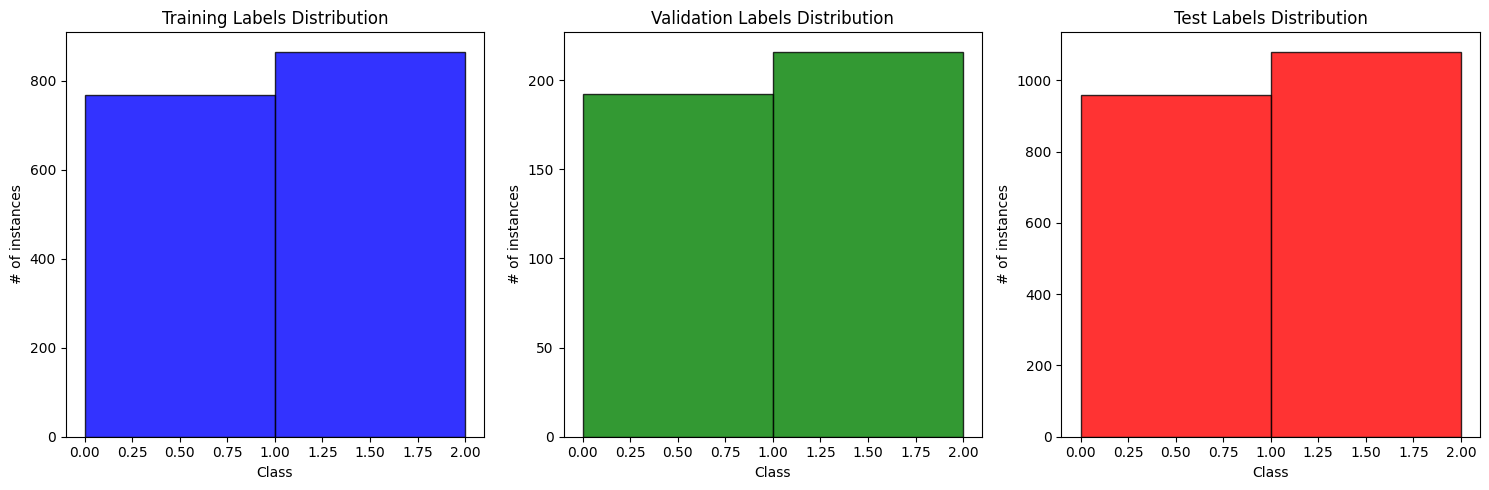

In [13]:
# Extract labels from the training generator
train_labels = train_generator.classes

# Extract labels from the validation generator
validation_labels = validation_generator.classes

# Extract labels from the test generator
test_labels = test_generator.classes

# Plot histograms for training, validation, and test labels
plt.figure(figsize=(15, 5))

# Plot for training labels
plt.subplot(1, 3, 1)
plt.hist(train_labels, bins=range(0, 3), alpha=0.8, color='blue', edgecolor='black')
plt.title('Training Labels Distribution')
plt.ylabel('# of instances')
plt.xlabel('Class')

# Plot for validation labels
plt.subplot(1, 3, 2)
plt.hist(validation_labels, bins=range(0, 3), alpha=0.8, color='green', edgecolor='black')
plt.title('Validation Labels Distribution')
plt.ylabel('# of instances')
plt.xlabel('Class')

# Plot for test labels
plt.subplot(1, 3, 3)
plt.hist(test_labels, bins=range(0, 3), alpha=0.8, color='red', edgecolor='black')
plt.title('Test Labels Distribution')
plt.ylabel('# of instances')
plt.xlabel('Class')

# Display the histograms
plt.tight_layout()
plt.show()

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the simple CNN model without dropout
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(128, 128, 3)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 128)       0

In [15]:
#compile the model
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [16]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/10
51/51 [==============================] - 109s 2s/step - loss: 0.7281 - accuracy: 0.5147 - val_loss: 0.6919 - val_accuracy: 0.5286
Epoch 2/10
51/51 [==============================] - 101s 2s/step - loss: 0.6927 - accuracy: 0.5297 - val_loss: 0.6923 - val_accuracy: 0.5234
Epoch 3/10
51/51 [==============================] - 99s 2s/step - loss: 0.6948 - accuracy: 0.5197 - val_loss: 0.6921 - val_accuracy: 0.5286
Epoch 4/10
51/51 [==============================] - 87s 2s/step - loss: 0.6919 - accuracy: 0.5315 - val_loss: 0.6903 - val_accuracy: 0.5417
Epoch 5/10
51/51 [==============================] - 88s 2s/step - loss: 0.6919 - accuracy: 0.5309 - val_loss: 0.6916 - val_accuracy: 0.5286
Epoch 6/10
51/51 [==============================] - 91s 2s/step - loss: 0.6915 - accuracy: 0.5272 - val_loss: 0.6917 - val_accuracy: 0.5286
Epoch 7/10
51/51 [==============================] - 100s 2s/step - loss: 0.6931 - accuracy: 0.5290 - val_loss: 0.6930 - val_accuracy: 0.4922
Epoch 8/10
51/51 

In [17]:
test_loss, test_accuracy = model.evaluate(
    test_generator,
    steps=test_generator.samples // test_generator.batch_size
)

print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

63/63 [==============================] - 46s 729ms/step - loss: 0.6918 - accuracy: 0.5243
Test loss: 0.6917936205863953
Test accuracy: 0.5243055820465088


64/64 [==============================] - 51s 781ms/step


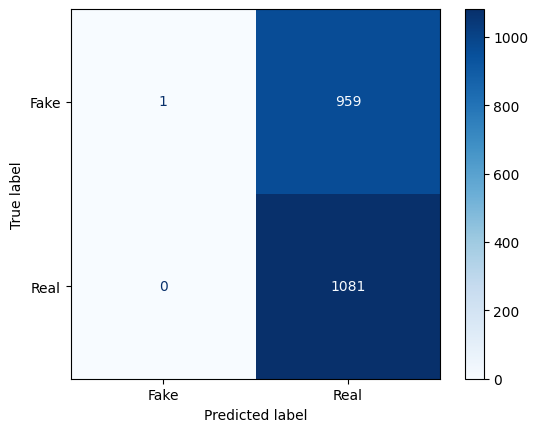

In [19]:
# Confusion Matrix
# Step 1: Get the true labels
true_labels = test_generator.classes

# Step 2: Make predictions - Predict on the entire test set
predictions = model.predict(test_generator)
predicted_labels = np.where(predictions > 0.5, 1, 0).flatten()  # Convert probabilities to binary class labels

# Step 3: Create the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Step 4: Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=test_generator.class_indices.keys())
disp.plot(cmap=plt.cm.Blues)
plt.show()

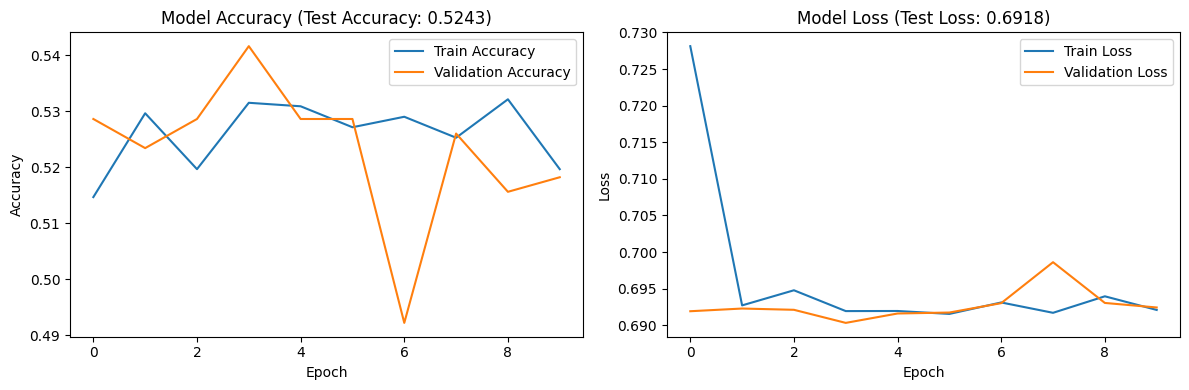

In [20]:
def plot_history(history, test_loss, test_accuracy):
    plt.figure(figsize=(12, 4))

    plt.subplot(121)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy (Test Accuracy: {test_accuracy:.4f})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(122)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss (Test Loss: {test_loss:.4f})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# After training and evaluating the model
plot_history(history, test_loss, test_accuracy)


In [21]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

def ImagePrediction(loc):
    test_image = image.load_img(loc, target_size = (128,128)) # Use image module from keras.preprocessing
    plt.axis('off')
    plt.imshow(test_image)
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis =0)
    result = model.predict(test_image)
    if result[0][0] == 1:
        predictions = 'Real'
    else:
        predictions = 'Fake'
    print('Prediction: ',predictions)



Enter Location of Image to predict: /content/drive/MyDrive/Real and Fake Face Detection Dataset/Real and Fake Face Detection Dataset/Fake/easy_100_1111.jpg
1/1 [==============================] - 0s 115ms/step
Prediction:  Fake


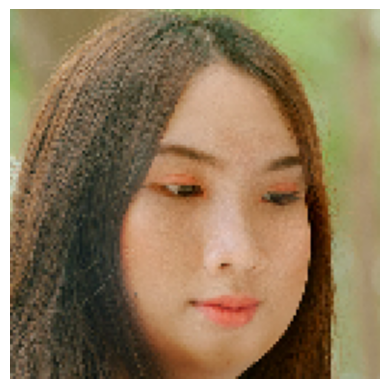

In [23]:
img = input("Enter Location of Image to predict: ")
test_image_1 = ImagePrediction(img)

Enter Location of Image to predict: /content/drive/MyDrive/Real and Fake Face Detection Dataset/Real and Fake Face Detection Dataset/Fake/easy_146_1110.jpg
1/1 [==============================] - 0s 34ms/step
Prediction:  Fake


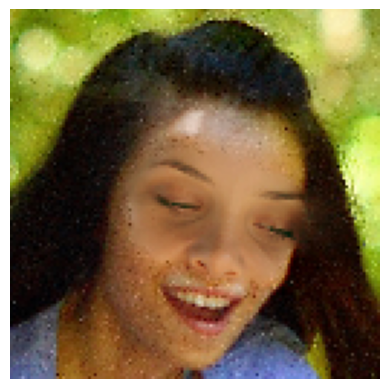

In [24]:
img = input("Enter Location of Image to predict: ")
test_image_2 = ImagePrediction(img)


Enter Location of Image to predict: /content/drive/MyDrive/Real and Fake Face Detection Dataset/Real and Fake Face Detection Dataset/Real/real_00012.jpg
1/1 [==============================] - 0s 32ms/step
Prediction:  Fake


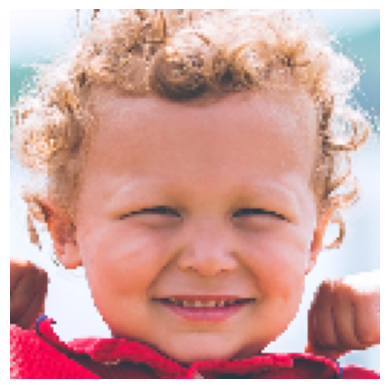

In [25]:
img = input("Enter Location of Image to predict: ")
test_image_3 = ImagePrediction(img)